# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import fiona
import psycopg2
import ssl

import os
os.getcwd()

'c:\\Users\\gilramolete\\OneDrive - UNIONBANK of the Philippines\\Documents 1\\Geospatial Analysis\\Geospatial Data Science with Python - Geopandas'

# Shapefiles

## Single Layer files

In [2]:
fpath = 'geopandas_data/geopandas/data'
raptors = gpd.read_file(f'{fpath}/Raptor_Nests.shp')
raptors.head()

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)


In [3]:
raptors.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   postgis_fi  876 non-null    float64 
 1   lat_y_dd    877 non-null    float64 
 2   long_x_dd   877 non-null    float64 
 3   lastsurvey  878 non-null    object  
 4   recentspec  879 non-null    object  
 5   recentstat  879 non-null    object  
 6   Nest_ID     879 non-null    int64   
 7   geometry    879 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), object(3)
memory usage: 55.1+ KB


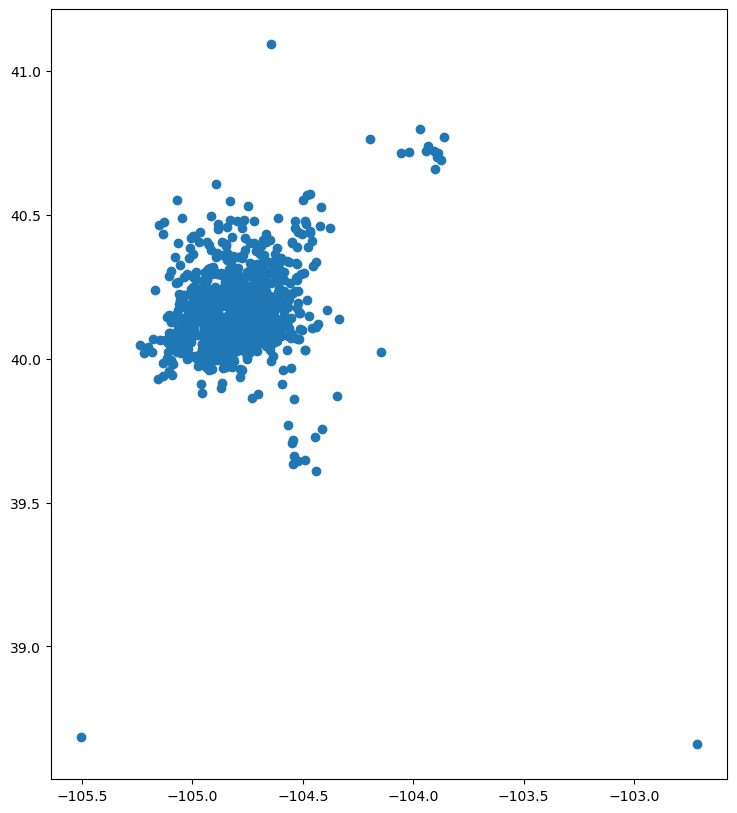

In [4]:
raptors.plot(figsize = (10, 10))
plt.show()

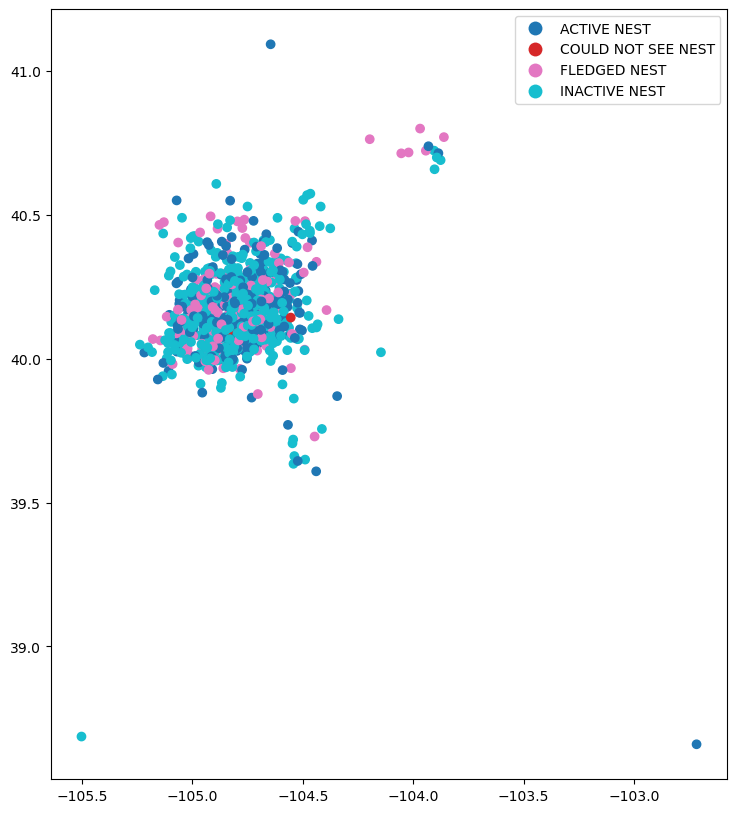

In [5]:
# Show with colors determined by a column value
raptors.plot(column = 'recentstat', legend = True, figsize = (10, 10))
plt.show()

In [6]:
# Coordinate reference system
raptors.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# We can view the same data in UTM Zone 13 if we have that info available
raptors_utm = gpd.read_file(f'{fpath}/Raptor_UTM.shp')
raptors_utm.crs

<Derived Projected CRS: EPSG:26913>
Name: NAD83 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 108°W and 102°W - onshore and offshore. Canada - Northwest Territories; Nunavut; Saskatchewan. United States (USA) - Colorado; Montana; Nebraska; New Mexico; North Dakota; Oklahoma; South Dakota; Texas; Wyoming.
- bounds: (-108.0, 28.98, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

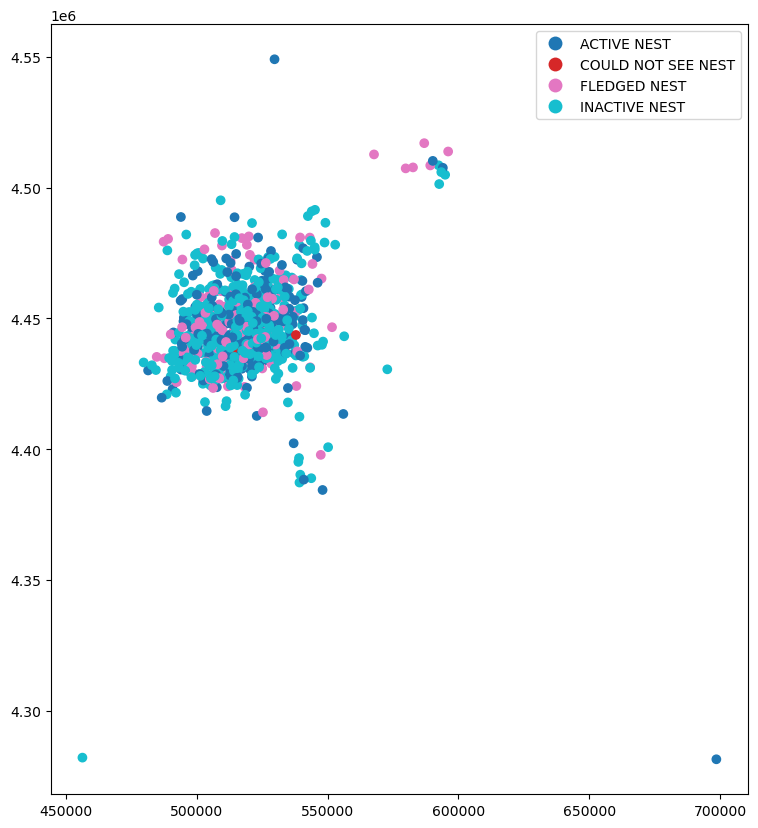

In [8]:
# If we plot it out it seems to be the same data, but values in X and Y are different
raptors_utm.plot(column = 'recentstat', legend = True, figsize = (10, 10))
plt.show()

In [9]:
# Easy to convert to a different CRS
raptors_utm2 = raptors.to_crs(epsg = 26913)
raptors_utm2.crs

<Derived Projected CRS: EPSG:26913>
Name: NAD83 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 108°W and 102°W - onshore and offshore. Canada - Northwest Territories; Nunavut; Saskatchewan. United States (USA) - Colorado; Montana; Nebraska; New Mexico; North Dakota; Oklahoma; South Dakota; Texas; Wyoming.
- bounds: (-108.0, 28.98, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

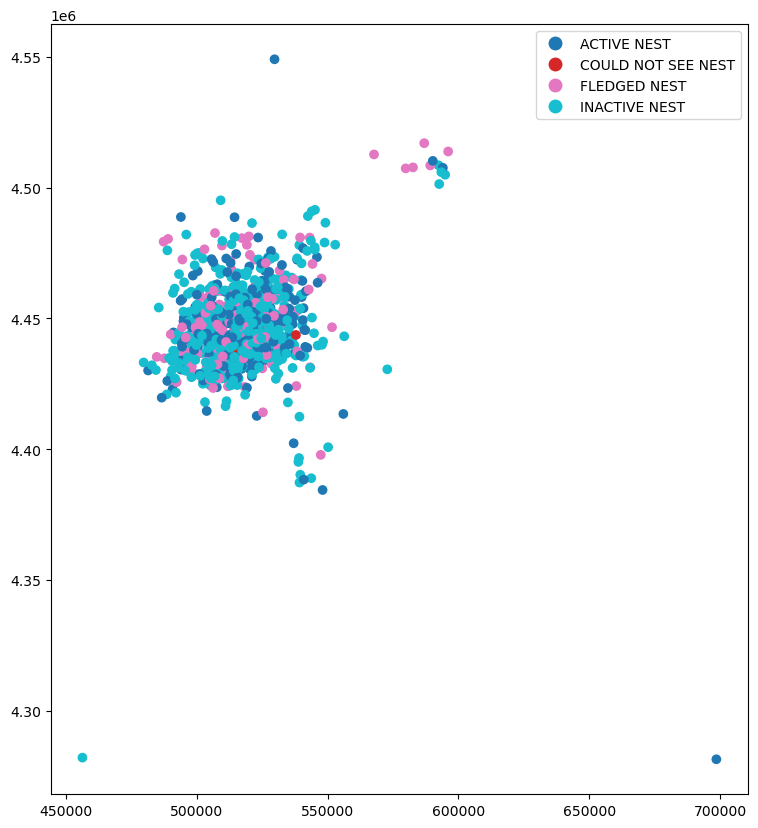

In [10]:
raptors_utm2.plot(column = 'recentstat', legend = True, figsize = (10, 10))
plt.show()

# Reading other File Types

## GeoJSON

In [11]:
raptors_jsn = gpd.read_file(f'{fpath}/wildlife_raptor.geojson')
raptors_jsn.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

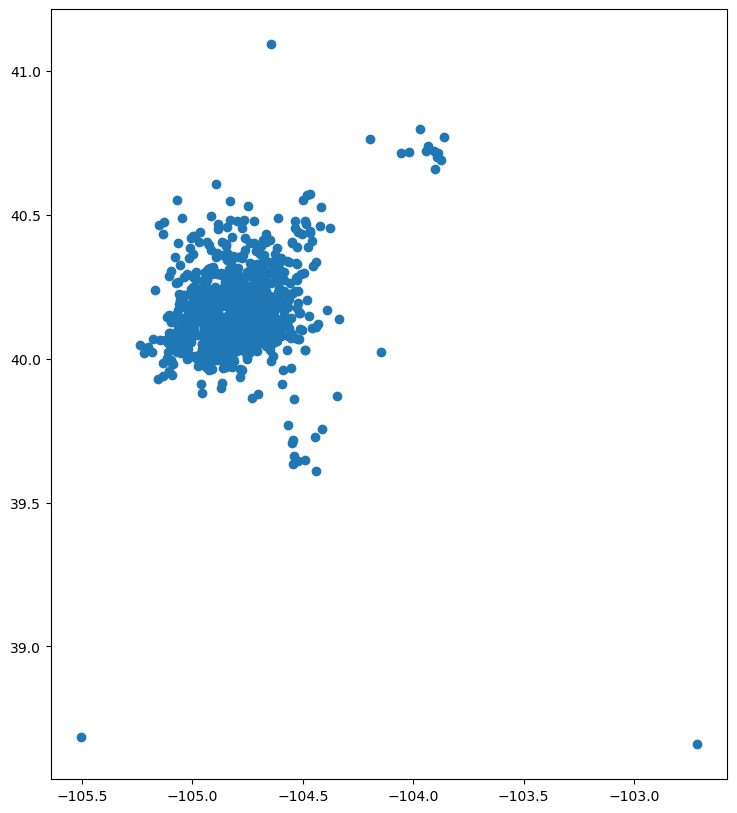

In [12]:
raptors_jsn.plot(figsize = (10, 10))
plt.show()

In [13]:
raptors_jsn.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   postgis_fid    876 non-null    int64   
 1   lat_y_dd       876 non-null    float64 
 2   long_x_dd      876 non-null    float64 
 3   lastsurvey     876 non-null    object  
 4   recentspecies  876 non-null    object  
 5   recentstatus   876 non-null    object  
 6   Nest_ID        876 non-null    int64   
 7   geometry       876 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 54.9+ KB


In [14]:
# Can also do for polygons
buowl = gpd.read_file(f'{fpath}/wildlife_buowl.geojson')
buowl.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

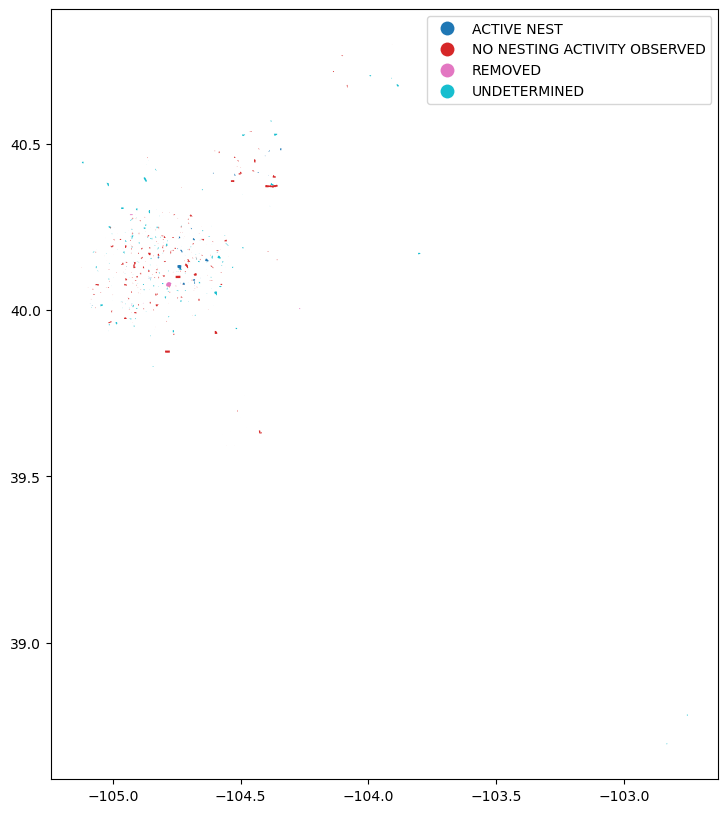

In [15]:
buowl.plot(column = 'recentstatus', legend = True, figsize = (10, 10))
plt.show()

In [16]:
buowl

,postgis_fid,habitat,hist_occup,recentstatus,habitat_id,geometry
0,15,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,"MULTIPOLYGON (((-104.61687 40.16775, -104.6167..."
1,41,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,"MULTIPOLYGON (((-104.65030 40.14220, -104.6501..."
2,42,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,"MULTIPOLYGON (((-104.59917 40.11202, -104.5990..."
3,43,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,"MULTIPOLYGON (((-104.69383 40.17870, -104.6936..."
4,54,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,"MULTIPOLYGON (((-104.68393 40.19921, -104.6840..."
...,...,...,...,...,...,...
468,447,Active Prairie Dog Colony,Yes,ACTIVE NEST,447,"MULTIPOLYGON (((-104.40336 40.46377, -104.4042..."
469,449,Active Prairie Dog Colony,Yes,ACTIVE NEST,449,"MULTIPOLYGON (((-104.38712 40.47787, -104.3871..."
470,461,Active Prairie Dog Colony,Yes,ACTIVE NEST,461,"MULTIPOLYGON (((-104.39052 40.40576, -104.3910..."
471,486,sdafdfadfa,Yes,ACTIVE NEST,486,"MULTIPOLYGON (((-105.08032 40.01568, -105.0817..."


## Multi-layer files

### Geopackage

In [17]:
eagles = gpd.read_file(f'{fpath}/DJBasin.gpkg')
eagles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   postgis_fi  1109 non-null   int64   
 1   type        1109 non-null   object  
 2   row_width   1109 non-null   float64 
 3   Project     1109 non-null   int64   
 4   geometry    1109 non-null   geometry
dtypes: float64(1), geometry(1), int64(2), object(1)
memory usage: 43.4+ KB


This defaults to reading the first layer in the geopackage. But what if you want to read a specific layer? What if you don't know what layers are contained? Use `fiona`.

In [18]:
fiona.listlayers(f'{fpath}/DJBasin.gpkg')

['LinearProjects',
 'BUOWL_Habitat',
 'BAEA_Nests',
 'Raptor_nests',
 'GBH_rookeries',
 'new_poly',
 'buowl_ho',
 'buowl_ho2']

In [19]:
eagles = gpd.read_file(f'{fpath}/DJBasin.gpkg', layer = 'BAEA_Nests')
eagles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   postgis_fi  70 non-null     int64   
 1   lat_y_dd    70 non-null     float64 
 2   long_x_dd   70 non-null     float64 
 3   status      70 non-null     object  
 4   nest_id     70 non-null     int64   
 5   geometry    70 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(1)
memory usage: 3.4+ KB


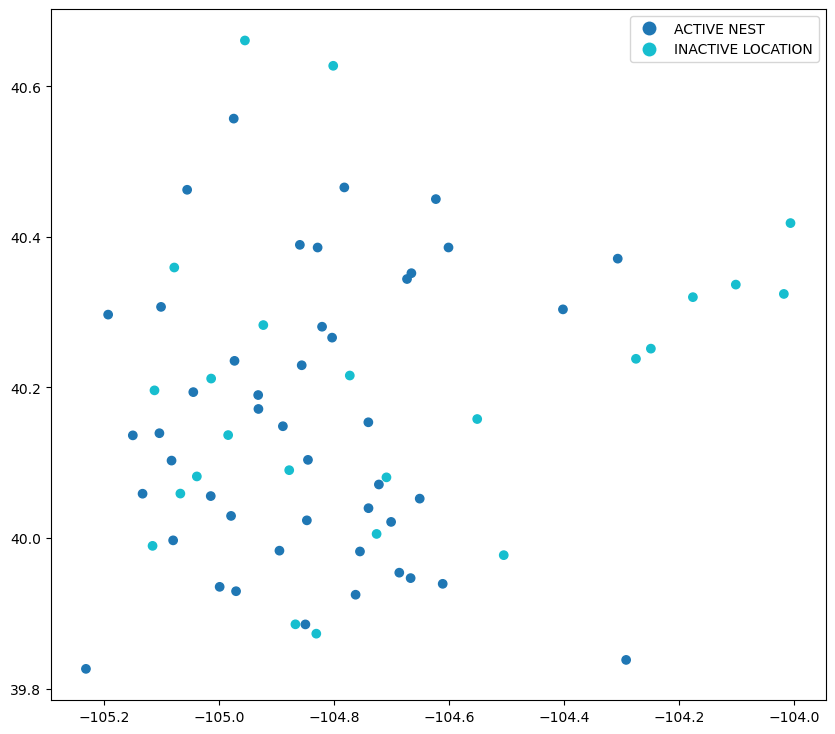

In [20]:
eagles.plot(column = 'status', legend = True, figsize = (10, 10))
plt.show()

We can read all layers at once into a dictionary that has the layer name as the key.

In [21]:
layers = {}
for lyr in fiona.listlayers(f'{fpath}/DJBasin.gpkg'):
    layers[lyr] = gpd.read_file(f'{fpath}/DJBasin.gpkg', layer = lyr)

layers

{'LinearProjects':       postgis_fi      type  row_width  Project  \
 0             50  Flowline       20.0       50   
 1             67  Pipeline       50.0       67   
 2             68  Pipeline       50.0       68   
 3             69  Flowline       20.0       69   
 4             70  Flowline       20.0       70   
 ...          ...       ...        ...      ...   
 1104        1105  Flowline       20.0     1105   
 1105        1106  Pipeline       50.0     1106   
 1106        1107  Pipeline       50.0     1107   
 1107        1108  Pipeline       50.0     1108   
 1108        1109  Pipeline       50.0     1109   
 
                                                geometry  
 0     MULTILINESTRING ((-104.59795 40.19258, -104.59...  
 1     MULTILINESTRING ((-105.05555 40.06609, -105.05...  
 2     MULTILINESTRING ((-105.04607 40.10830, -105.04...  
 3     MULTILINESTRING ((-104.83998 40.21731, -104.83...  
 4     MULTILINESTRING ((-104.77210 40.20982, -104.77...  
 ...          

<AxesSubplot: >

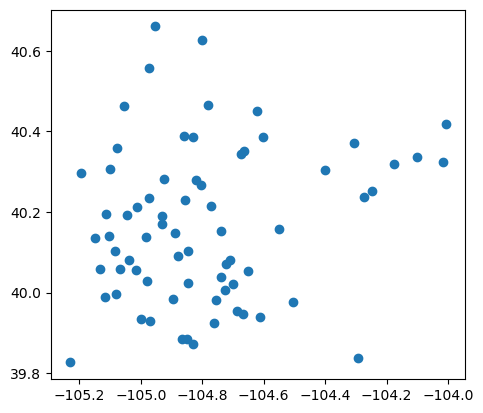

In [22]:
layers['BAEA_Nests'].plot()

### Geodatabase

In [23]:
# List all layers in the database
fiona.listlayers(f'{fpath}/DJBasin.gdb')

['Burrowing_Owl_Habitat',
 'Bald_Eagle_Nests',
 'Raptor_Nests',
 'Heron_Rookeries',
 'Linear_Projects']

In [24]:
# Read layers like the geopackage layer
gbh = gpd.read_file(f'{fpath}/DJBasin.gdb', layer = 'Heron_Rookeries')
gbh.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   postgis_fi    55 non-null     int64   
 1   species       55 non-null     object  
 2   activity      55 non-null     object  
 3   Shape_Length  55 non-null     float64 
 4   Shape_Area    55 non-null     float64 
 5   geometry      55 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 2.7+ KB


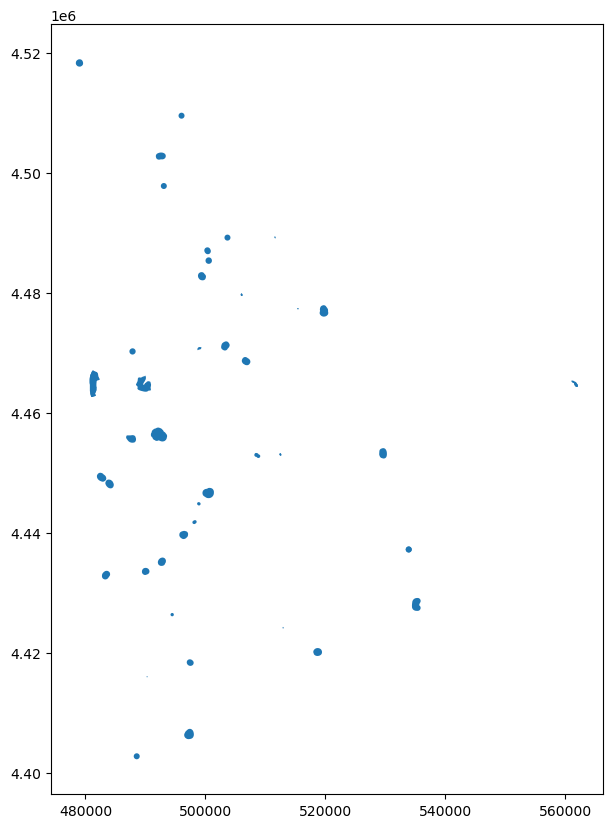

In [25]:
gbh.plot(figsize = (10, 10))
plt.show()

# PostGIS

This requires a database connection object.

In [26]:
try:
    conn = psycopg2.connect("dbname='korimage_enterprise' user='korimage_reader' host='www.korimageo.com' password='reader'")
except:
    print("I am unable to connect to the database")

I am unable to connect to the database


In [27]:
try:
    eagles = gpd.read_postgis("SELECT gid, lat_y_dd AS latitude, long_x_dd AS longitude, status, nest_id, geom FROM dj_eagle WHERE gid <=70 AND status = 'ACTIVE NEST'", conn)
except:
    print('Sad')

Sad


In [28]:
try:
    eagle_table = pd.read_sql_query("SELECT gid, lat_y_dd AS latitude, long_x_dd AS longitude, status, nest_id, geom FROM dj_eagle WHERE gid <=70", conn)
except:
    print('Sad')

Sad


# Advanced Techniques for reading data

<AxesSubplot: >

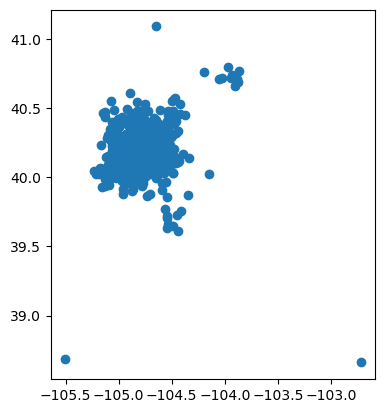

In [29]:
raptors.plot()

In [30]:
# Check the bounding box
raptors.total_bounds

array([-105.50223,   38.66005, -102.71759,   41.09211])

In Fiona/Shapely, world bounding boxces are a list or tuple orders with the lower left x-coordinate first, lower left y-coordinate second, upper right x-coordinate third, and upper right y-coordinate fourth.

Knowing this, we can create a tuple that contains our area of interest. This will serve as the bounding box of the area we are interested in.

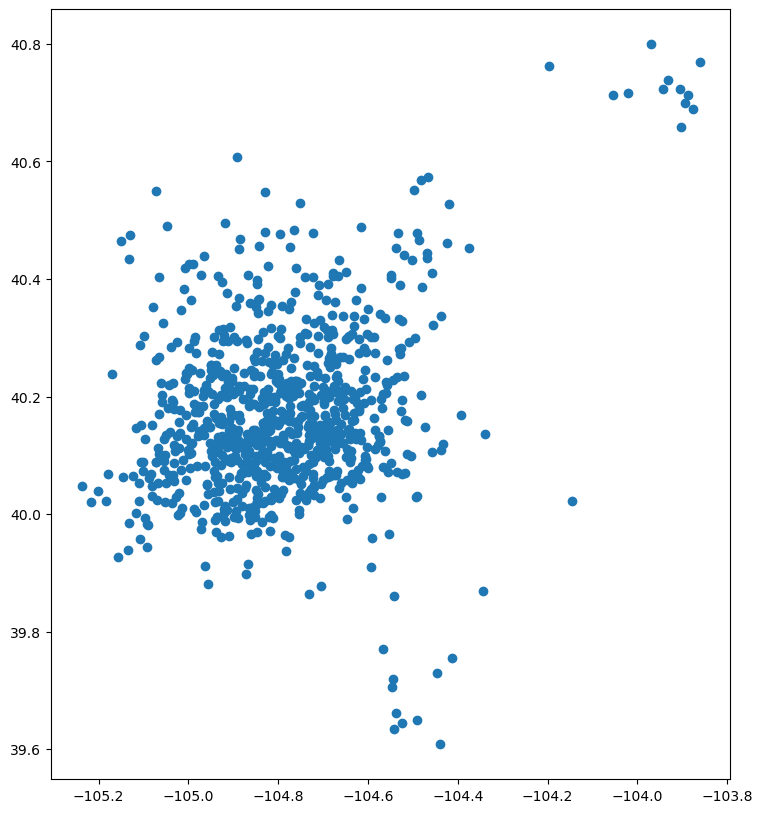

In [31]:
aoi = (-105.3, 39.5, -103.7, 40.8)

raptors = gpd.read_file(f'{fpath}/Raptor_Nests.shp', bbox = aoi)
raptors.plot(figsize = (10, 10))
plt.show()

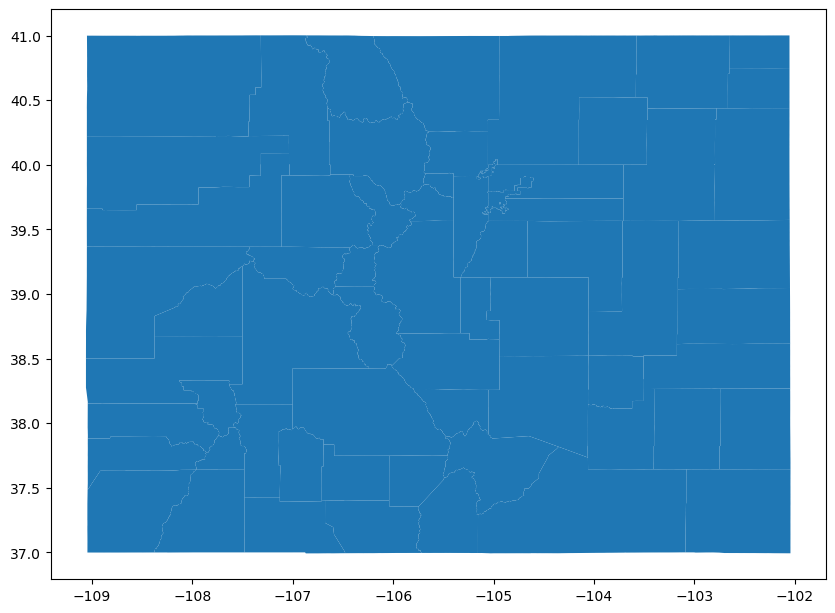

In [32]:
# New dataset, boundaries of all counties in Colorado
counties = gpd.read_file(f'{fpath}/colorado_counties.shp')
counties.plot(figsize = (10, 10))
plt.show()

We can simply pass the entire GeoDataFrame and GeoPandas wil know to use its total bounds

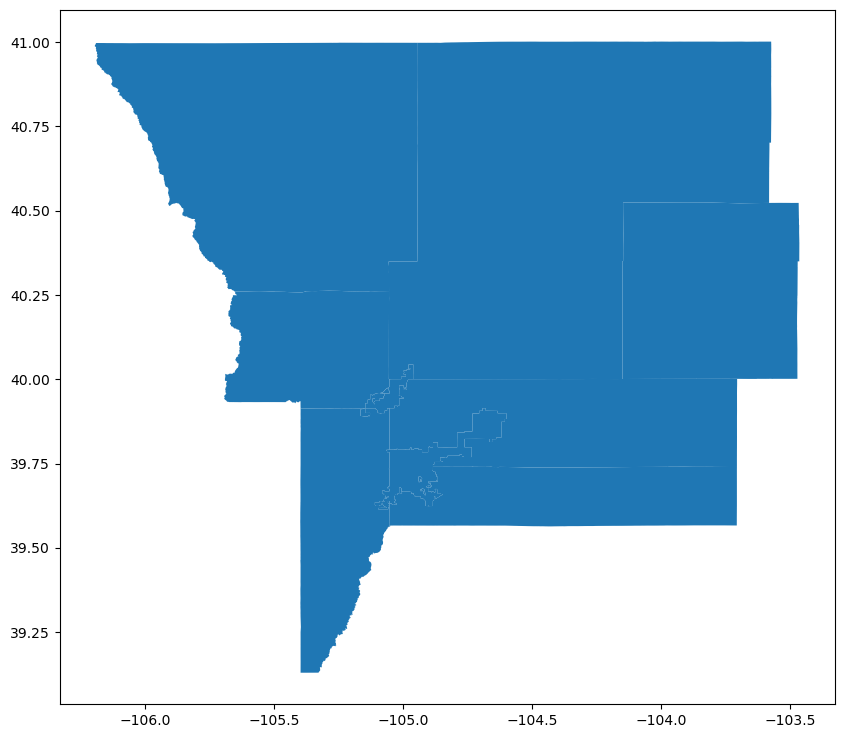

In [33]:
counties = gpd.read_file(f'{fpath}/colorado_counties.shp', bbox = raptors)
counties.plot(figsize = (10, 10))
plt.show()

In [34]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    9 non-null      int64   
 1   COUNTYFP    9 non-null      object  
 2   Shape_Leng  9 non-null      float64 
 3   Shape_Area  9 non-null      float64 
 4   low         9 non-null      float64 
 5   lowmod      9 non-null      float64 
 6   LMMI        9 non-null      float64 
 7   lowmoduniv  9 non-null      float64 
 8   lowmod_pct  9 non-null      float64 
 9   NAMELSAD10  9 non-null      object  
 10  geometry    9 non-null      geometry
dtypes: float64(7), geometry(1), int64(1), object(2)
memory usage: 920.0+ bytes


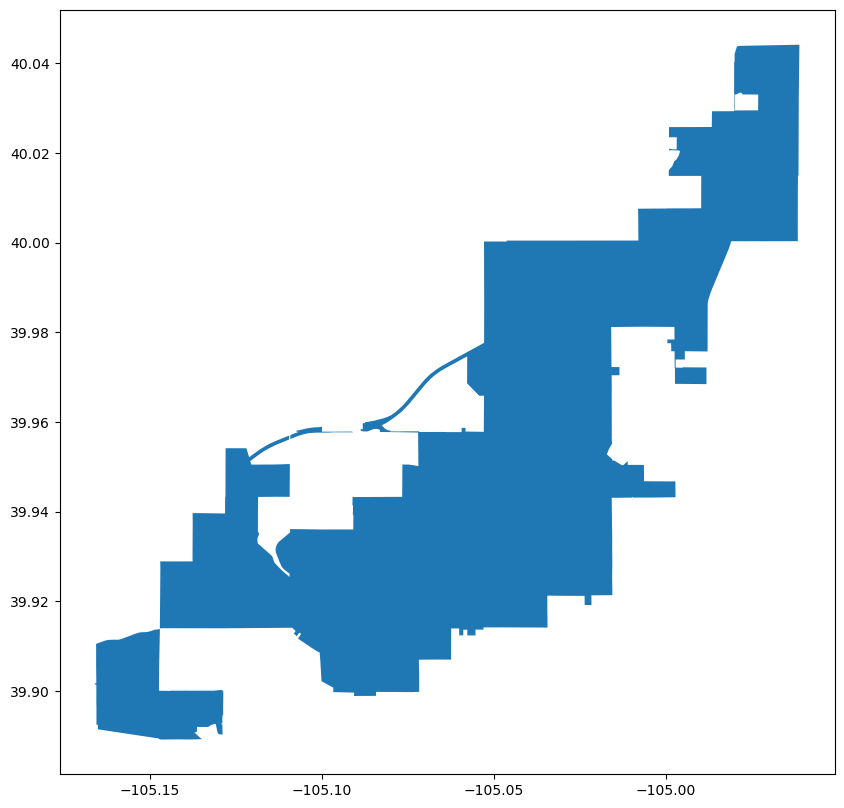

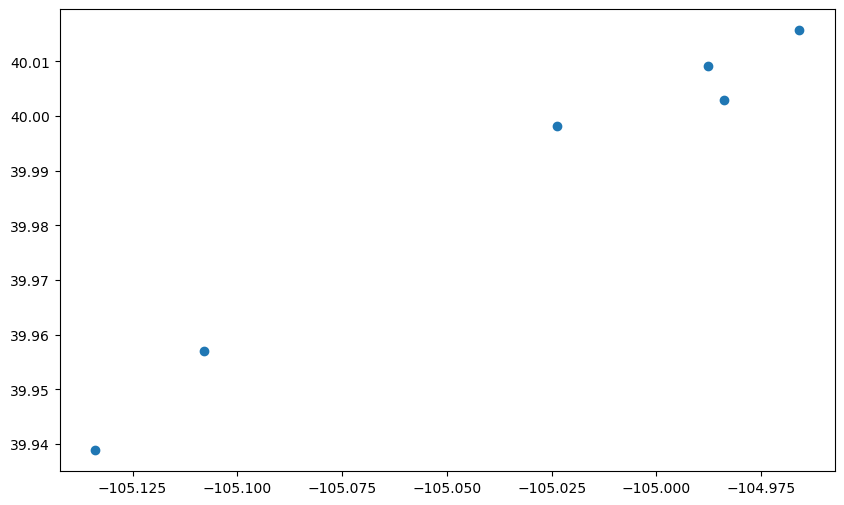

In [35]:
broomfield = counties[counties.NAMELSAD10 == "Broomfield County"]
broomfield.plot(figsize = (10, 10))

broomfield_nests = gpd.read_file(f'{fpath}/Raptor_Nests.shp', mask = broomfield)
broomfield_nests.plot(figsize = (10, 10))

plt.show()

<AxesSubplot: >

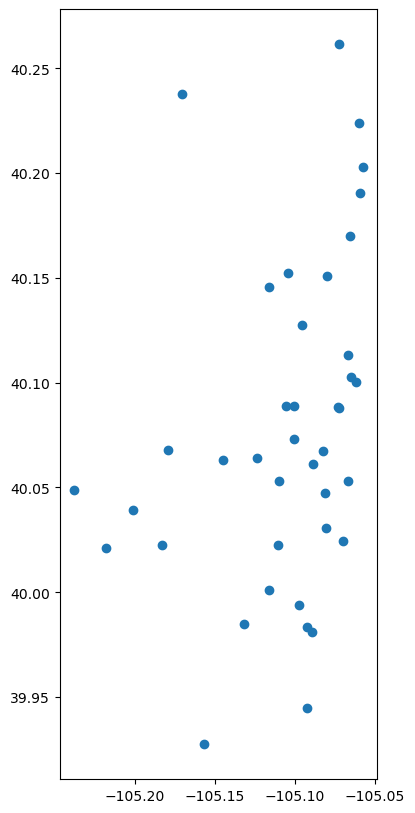

In [36]:
boulder_nests = gpd.read_file(f'{fpath}/Raptor_Nests.shp', mask = counties[counties.NAMELSAD10 == 'Boulder County'])
boulder_nests.plot(figsize = (10, 10))

# Reading Tabular Data

Can be read into a Pandas DataFrame in a number of ways.
* Read from a csv file
* Read from an excel spreadsheet
* Read from a SQL database
* Read just the tabular part of a spatial file by setting ignore_geometry parameter to True
* Read tables from a website
* Many other formats

In [37]:
BAEA_sources = pd.read_csv(f'{fpath}/BAEA_sources.csv')
BAEA_sources

,code,source
0,1,Colorado Fish Wildlife and Parks
1,2,US Fish and Wildlife Service
2,3,ABC Environmental
3,4,123 Environmental


In [38]:
BAEA_surveys = pd.read_csv(f'{fpath}/BAEA_surveys.csv')
BAEA_surveys

,id,nest,surveyor,date,result
0,6.0,52,Dan Smith,2015-07-11,ACTIVE NEST
1,8.0,54,Mike Miller,2015-05-08,ACTIVE NEST
2,9.0,25,Mike Miller,2015-05-13,INACTIVE NEST
3,10.0,65,Mike Miller,2015-08-21,INACTIVE NEST
4,11.0,33,Mike Miller,2015-06-26,ACTIVE NEST
...,...,...,...,...,...
1992,1997.0,64,Mike Miller,2015-06-26,FLEDGED NEST
1993,1998.0,56,George Baker,2015-08-17,ACTIVE NEST
1994,1999.0,16,Dan Smith,2015-08-30,INACTIVE NEST
1995,2000.0,60,Mike Miller,2015-07-22,INACTIVE NEST


## Excel file

In [39]:
albatross = pd.read_excel(f'{fpath}/wildlife_sightings.xls', sheet_name = 'albatross')
albatross

,id,latitude,longitude
0,1,39.527924,-105.575747
1,2,39.574666,-105.536514
2,3,39.217363,-105.374948
3,4,39.755457,-105.091596
4,5,39.197807,-105.649858
5,6,39.642896,-105.326078
6,7,39.032123,-105.999383
7,8,39.119083,-105.392691
8,9,39.874840,-105.207063
9,10,39.400908,-105.442039


<AxesSubplot: >

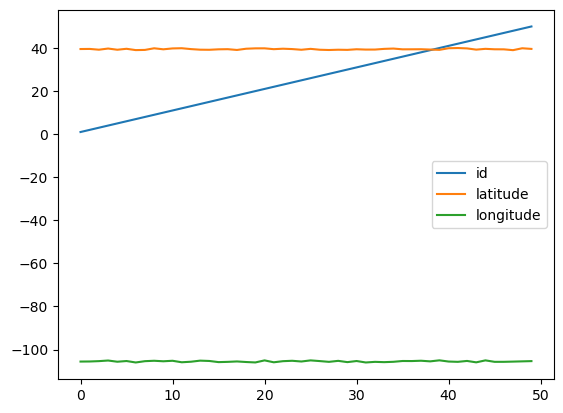

In [40]:
albatross.plot()

## Converting non-spatial data to spatial data

In [41]:
albatross_spatial = gpd.GeoDataFrame(
    albatross, geometry=gpd.points_from_xy(albatross["longitude"], albatross["latitude"]))
albatross_spatial

,id,latitude,longitude,geometry
0,1,39.527924,-105.575747,POINT (-105.57575 39.52792)
1,2,39.574666,-105.536514,POINT (-105.53651 39.57467)
2,3,39.217363,-105.374948,POINT (-105.37495 39.21736)
3,4,39.755457,-105.091596,POINT (-105.09160 39.75546)
4,5,39.197807,-105.649858,POINT (-105.64986 39.19781)
5,6,39.642896,-105.326078,POINT (-105.32608 39.64290)
6,7,39.032123,-105.999383,POINT (-105.99938 39.03212)
7,8,39.119083,-105.392691,POINT (-105.39269 39.11908)
8,9,39.874840,-105.207063,POINT (-105.20706 39.87484)
9,10,39.400908,-105.442039,POINT (-105.44204 39.40091)


# HTML Table from the Web

In [44]:
# !pip3 install lxml html5lib BeautifulSoup4
ssl._create_default_https_context = ssl._create_unverified_context

# Provide a webpage
# Return value is a Python list of pandas dataframes
gdp_list = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita")
gdp_list

[                                                   0  \
 0  .mw-parser-output .legend{page-break-inside:av...   
 
                                                    1  \
 0  $20,000 – $30,000 $10,000 – $20,000 $5,000 – $...   
 
                                  2  
 0  $1,500 – $2,500 <$1,500 No data  ,
               Country/Territory UN Region IMF[5][6]       World Bank[7]        \
               Country/Territory UN Region  Estimate  Year      Estimate  Year   
 0                  Luxembourg *    Europe    141587  2022        134545  2021   
 1               Liechtenstein *    Europe         —     —             —     —   
 2                   Singapore *      Asia    131426  2022        116487  2021   
 3                     Ireland *    Europe    131034  2022        106352  2021   
 4                      Monaco *    Europe         —     —             —     —   
 ..                          ...       ...       ...   ...           ...   ...   
 225                  DR Congo *   

In [47]:
for i in range(0, len(gdp_list)):
    display(gdp_list[i])

,0,1,2
0,.mw-parser-output .legend{page-break-inside:av...,"$20,000 – $30,000 $10,000 – $20,000 $5,000 – $...","$1,500 – $2,500 <$1,500 No data"


Country/Territory UN Region IMF[5][6]       World Bank[7]        \
              Country/Territory UN Region  Estimate  Year      Estimate  Year   
0                  Luxembourg *    Europe    141587  2022        134545  2021   
1               Liechtenstein *    Europe         —     —             —     —   
2                   Singapore *      Asia    131426  2022        116487  2021   
3                     Ireland *    Europe    131034  2022        106352  2021   
4                      Monaco *    Europe         —     —             —     —   
..                          ...       ...       ...   ...           ...   ...   
225                  DR Congo *    Africa      1328  2022          1180  2021   
226                   Somalia *    Africa      1322  2022          1249  2021   
227  Central African Republic *    Africa      1088  2022           920  2021   
228               South Sudan *    Africa       934  2022          1182  2015   
229                   Burundi *    Africa       865  2022           775  2021   

    CIA[8][9][10]        
         Estimate  Year  
0          110300  2020  
1          139100  2009  
2           93400  2020  
3           89700  2020  
4          115700  2015  
..            ...   ...  
225          1100  2020  
226           800  2020  
227           900  2020  
228          1600  2017  
229           700  2020  

[230 rows x 8 columns]

,0,1,2
0,International Monetary Fund (2017),World Bank (2016)[22][23],NaN
1,Rank Country/Territory Type 1 Qatar Oil & Gas...,Rank Country/Territory Type 1 Qatar Oil & Gas...,NaN
2,Rank,Country/Territory,Type
3,1,Qatar,Oil & Gas
4,—,Macau,Tax haven (Sink OFC)
5,2,Luxembourg,Top 10 Tax haven (Sink OFC)
6,3,Singapore,Top 10 Tax haven (Conduit OFC)
7,4,Brunei,Oil & Gas
8,5,Ireland,Top 10 Tax haven (Conduit OFC)
9,6,Norway,Oil & Gas


,Rank,Country/Territory,Type
0,1,Qatar,Oil & Gas
1,—,Macau,Tax haven (Sink OFC)
2,2,Luxembourg,Top 10 Tax haven (Sink OFC)
3,3,Singapore,Top 10 Tax haven (Conduit OFC)
4,4,Brunei,Oil & Gas
5,5,Ireland,Top 10 Tax haven (Conduit OFC)
6,6,Norway,Oil & Gas
7,7,Kuwait,Oil & Gas
8,8,United Arab Emirates,Oil & Gas
9,9,Switzerland,Top 10 Tax Haven (Conduit OFC)


,Rank,Country/Territory,Type
0,1,Qatar,Oil & Gas
1,2,Luxembourg,Top 10 Tax haven (Sink OFC)
2,—,Macau,Tax haven (Sink OFC)
3,3,Singapore,Top 10 Tax haven (Conduit OFC)
4,4,Brunei,Oil & Gas
5,5,United Arab Emirates,Oil & Gas
6,6,Ireland,Top 10 Tax haven (Conduit OFC)
7,7,Switzerland,Top 10 Tax haven (Conduit OFC)
8,8,Norway,Oil & Gas
9,—,Hong Kong,Top 10 Tax haven (Sink OFC)


,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vteLists of countries by GDP rankings",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vteLists of countries by GDP rankings.1"
0,Nominal,Per capita Past and projected per capita Secto...
1,Purchasing power parity (PPP),Per capita Past per capita Past and projected ...
2,Growth rate,African countries Asian states European Union ...
3,Gross national income (GNI),PPP per capita Nominal per capita
4,Countries by region,Africa PPP nominal Commonwealth of Nations PPP...
5,Subnational divisions,Albania Argentina Australia Austria Baltic Sta...
6,Lists of countries by financial rankings List ...,Lists of countries by financial rankings List ...


,vteEconomic classification of countries,vteEconomic classification of countries.1
0,Developed country Developing country Least dev...,Developed country Developing country Least dev...
1,Three-World Model,First World Second World Third World Fourth World
2,Gross domestic product (GDP),Nominal By country past and projected per capi...
3,Nominal,By country past and projected per capita per c...
4,Purchasing power parity (PPP),By country future estimates per capita per cap...
5,Gross national income (GNI),"(Nominal, Atlas method) per capita (PPP) per c..."
6,Wages,Average wage Europe Employee compensation (per...
7,Wealth,Wealth per adult Europe Financial assets per c...
8,Other national accounts,Gross National Happiness Net material product ...
9,Human development,Human Development Index by country inequality-...


,0,1
0,Nominal,By country past and projected per capita per c...
1,Purchasing power parity (PPP),By country future estimates per capita per cap...


,vteLists of countries by financial rankings,vteLists of countries by financial rankings.1
0,Trade,Account balance % of GDP Exports net per capit...
1,Investment,FDI received past FDI abroad GFI
2,Funds,Forex reserves Forex reserves (ex. gold) Gold ...
3,Budget and debt,Government budget PPP % of GDP per capita Cred...
4,Income and taxes,Tax rates Inheritance tax Tax revenue Wage ave...
5,Bank rates,Central bank interest rate Commercial bank pri...
6,Currency,Exchange rates to US$ Inflation rate
7,Other,Financial Development Index Corporate governan...
8,Lists of countries by GDP rankings List of int...,Lists of countries by GDP rankings List of int...


# Write a GeoDataFrame to a disk file or database

In [49]:
# Convert shapefile to a different CRS
buowl_ll = gpd.read_file(f'{fpath}/BUOWL_Habitat.shp')

# Create GeoDataFrame
buowl_utm = buowl_ll.to_crs(epsg = 26913)
buowl_utm.crs

<Derived Projected CRS: EPSG:26913>
Name: NAD83 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 108°W and 102°W - onshore and offshore. Canada - Northwest Territories; Nunavut; Saskatchewan. United States (USA) - Colorado; Montana; Nebraska; New Mexico; North Dakota; Oklahoma; South Dakota; Texas; Wyoming.
- bounds: (-108.0, 28.98, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [50]:
# Can save 
buowl_utm.to_file(f'{fpath}/BUOWL_UTM.shp')

# Or save a subset
buowl_utm[buowl_utm['hist_occup'] == 'Yes'].to_file(f'{fpath}/BUOWL_UTM_HO.shp')

## Saving as a geopackage layer

In [51]:
fiona.listlayers(f'{fpath}/DJBasin.gpkg')

['LinearProjects',
 'BUOWL_Habitat',
 'BAEA_Nests',
 'Raptor_nests',
 'GBH_rookeries',
 'new_poly',
 'buowl_ho',
 'buowl_ho2']

In [53]:
# buowl_ll[buowl_ll["hist_occup"]=='Yes'].to_file("data/DJBasin.gpkg", layer = "buowl_ho2", driver = "GPKG")

## Converting to GeoJSON

In [55]:
# Method 1 - Writing a file
# buowl_ll[buowl_ll["hist_occup"]=='Yes'].to_file("data/wildlife_buowl_ho.geojson", driver = "GeoJSON")

In [56]:
# Method 2 - Converting to string
jsn = buowl_utm.to_json()
jsn

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"postgis_fi": 15.0, "habitat": "Ground squirrel-mixed Vegetation", "hist_occup": "Undetermined", "recentstat": "NO NESTING ACTIVITY OBSERVED", "habitat_id": 15, "active2017": "FALSE"}, "geometry": {"type": "Polygon", "coordinates": [[[532623.764900331, 4446446.0723849125], [532633.2798297342, 4446411.704764361], [532533.1471089467, 4446132.67408217], [532524.9225536273, 4446064.9313489], [532535.3987518962, 4446005.038759931], [532532.1260643974, 4445973.945900016], [532540.7561781419, 4445947.344075092], [532521.2417072281, 4445930.610787729], [532500.7707560322, 4445938.292480133], [532476.9412007277, 4445934.860240868], [532464.9811994331, 4445943.688539777], [532462.3218018479, 4445968.096162188], [532500.5263611242, 4446193.5814337], [532525.719567852, 4446275.826561868], [532550.9981248598, 4446338.092930264], [532623.764900331, 4446446.0723849125]]]}}, {"id": "1", "type": "Feature", "proper

## Saving to CSV

In [57]:
buowl_utm.to_csv(f'{fpath}/buowl.csv')
help(buowl_utm.to_postgis)

Help on method to_postgis in module geopandas.geodataframe:

to_postgis(name, con, schema=None, if_exists='fail', index=False, index_label=None, chunksize=None, dtype=None) method of geopandas.geodataframe.GeoDataFrame instance
    Upload GeoDataFrame into PostGIS database.
    
    This method requires SQLAlchemy and GeoAlchemy2, and a PostgreSQL
    Python driver (e.g. psycopg2) to be installed.
    
    Parameters
    ----------
    name : str
        Name of the target table.
    con : sqlalchemy.engine.Connection or sqlalchemy.engine.Engine
        Active connection to the PostGIS database.
    if_exists : {'fail', 'replace', 'append'}, default 'fail'
        How to behave if the table already exists:
    
        - fail: Raise a ValueError.
        - replace: Drop the table before inserting new values.
        - append: Insert new values to the existing table.
    schema : string, optional
        Specify the schema. If None, use default schema: 'public'.
    index : bool, defaul

c:\Users\gilramolete\Anaconda3\envs\pls\Lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


# DataFrames 101

## Referencing series

In [58]:
raptors = gpd.read_file(f'{fpath}/Raptor_Nests.shp')
raptors.recentspec

0        Swainsons Hawk
1        Swainsons Hawk
2        Swainsons Hawk
3        Swainsons Hawk
4        Swainsons Hawk
             ...       
874       Red-tail Hawk
875       Red-tail Hawk
876    Northern Harrier
877                SWHA
878                RTHA
Name: recentspec, Length: 879, dtype: object

In [59]:
raptors['recentspec']

0        Swainsons Hawk
1        Swainsons Hawk
2        Swainsons Hawk
3        Swainsons Hawk
4        Swainsons Hawk
             ...       
874       Red-tail Hawk
875       Red-tail Hawk
876    Northern Harrier
877                SWHA
878                RTHA
Name: recentspec, Length: 879, dtype: object

In [60]:
# Columns
raptors.columns

Index(['postgis_fi', 'lat_y_dd', 'long_x_dd', 'lastsurvey', 'recentspec',
       'recentstat', 'Nest_ID', 'geometry'],
      dtype='object')

In [61]:
for fld in raptors.columns:
    if raptors[fld].dtype == 'object' and raptors[fld].nunique() < 20:
        print(raptors[fld].name, raptors[fld].unique())

recentspec ['Swainsons Hawk' 'Red-tail Hawk' 'Northern Harrier' 'SWHA' 'RTHA']
recentstat ['INACTIVE NEST' 'ACTIVE NEST' 'FLEDGED NEST' 'COULD NOT SEE NEST']


In [62]:
# Subset by attributes
raptors[(raptors['recentstat'] == 'ACTIVE NEST') | (raptors['recentspec'] == 'Swainsons Hank')]

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)
7,6.0,40.357587,-104.737632,2011-01-06,Swainsons Hawk,ACTIVE NEST,6,POINT (-104.67679 40.30686)
15,14.0,40.126690,-105.020896,2011-01-06,Swainsons Hawk,ACTIVE NEST,14,POINT (-105.05943 40.19046)
25,16.0,40.243589,-104.730385,2011-01-06,Swainsons Hawk,ACTIVE NEST,16,POINT (-104.72963 40.23480)
26,17.0,40.185072,-104.844298,2011-01-06,Red-tail Hawk,ACTIVE NEST,17,POINT (-104.87677 40.23926)
...,...,...,...,...,...,...,...,...
845,882.0,40.045620,-104.908517,2015-05-22,Red-tail Hawk,ACTIVE NEST,882,POINT (-104.98760 40.00910)
847,884.0,40.068421,-104.862728,2015-06-03,Red-tail Hawk,ACTIVE NEST,884,POINT (-104.91311 40.00704)
848,885.0,40.189083,-104.865355,2015-06-05,Red-tail Hawk,ACTIVE NEST,885,POINT (-104.92905 40.24316)
849,886.0,39.988339,-105.067373,2015-06-11,Swainsons Hawk,ACTIVE NEST,886,POINT (-105.15664 39.92748)


### Subset by coordinates

<AxesSubplot: >

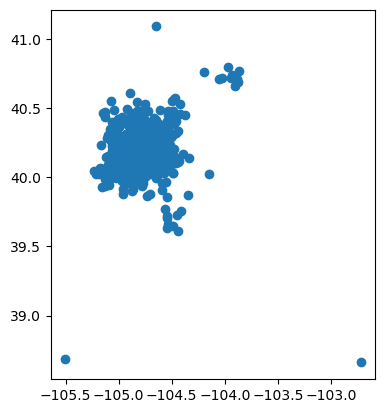

In [63]:
raptors.plot()

<AxesSubplot: >

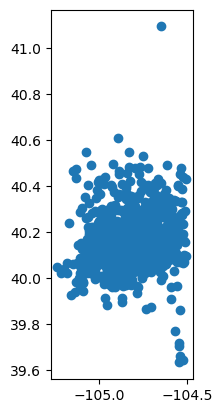

In [64]:
raptors.cx[:-104.5,39.5:].plot()

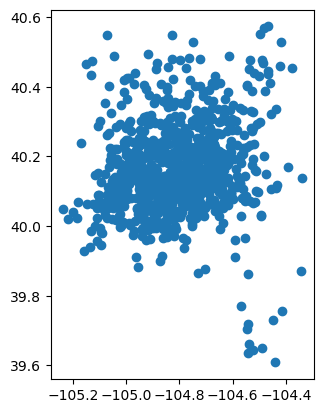

In [65]:
raptors_cut = raptors.cx[:-104.3, 39.5:40.6]
raptors_cut.plot()
plt.show()

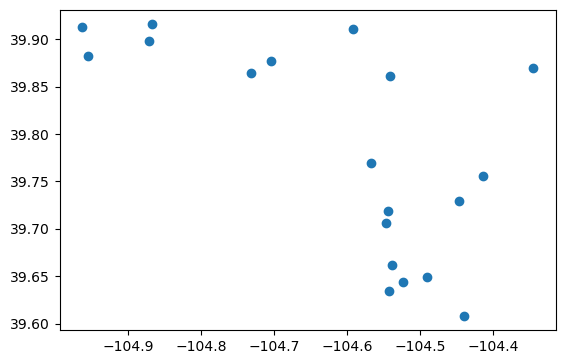

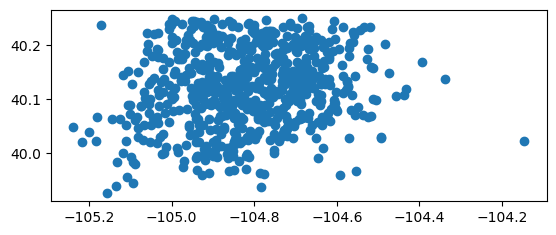

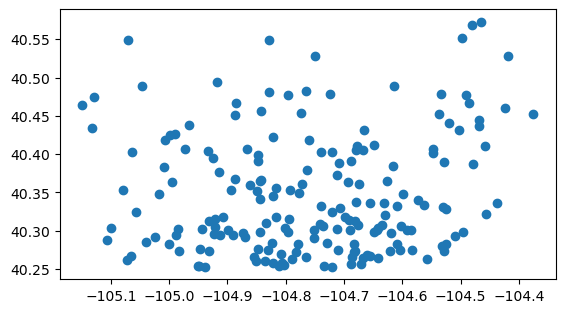

In [66]:
y_min = raptors_cut['lat_y_dd'].min()
y_max = raptors_cut['lat_y_dd'].max()
y_step = (y_max - y_min) / 3

for i in range(3):
    raptors.cx[:, y_min + i * y_step:y_min + (i + 1) * y_step].plot()

plt.show()

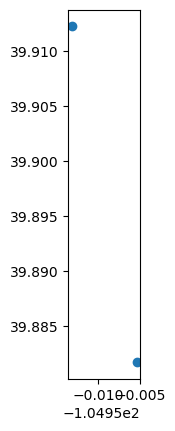

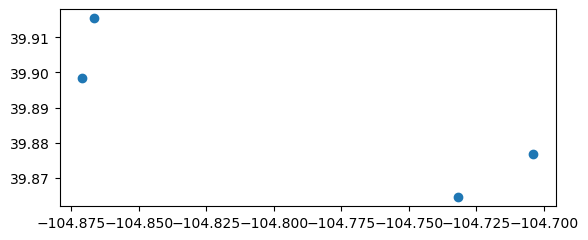

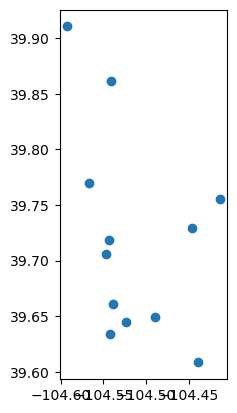

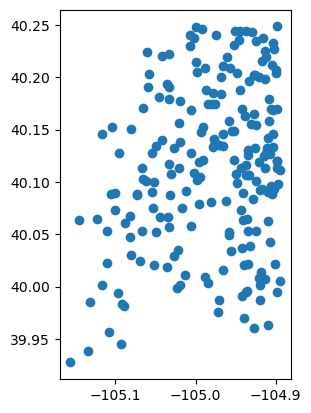

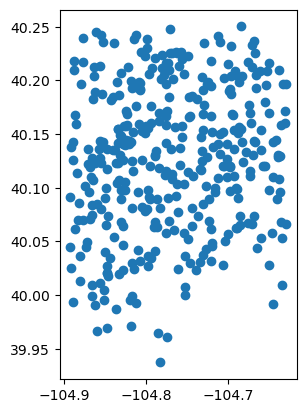

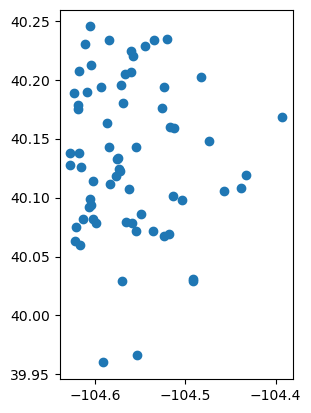

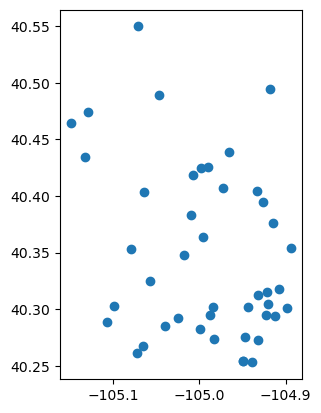

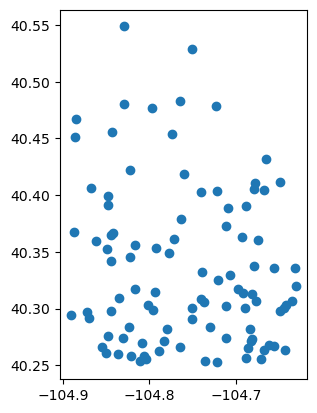

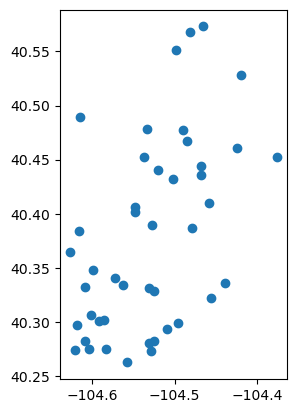

In [68]:
x_min = raptors_cut['long_x_dd'].min()
x_max = raptors_cut['long_x_dd'].max()
x_step = (x_max - x_min) / 3

for y in range(3):
    for x in range(3):
        raptors_cut.cx[x_min + x * x_step:x_min + (x + 1) * x_step,
                        y_min + y * y_step:y_min + (y + 1) * y_step].plot()

plt.show()

## Referencing cell values

- `loc` - referncing by column and row index values
- `iloc` - referncing by integers
- `at` and `iat` - referencing single cell

In [69]:
raptors.loc[[10, 3, 5], ['Nest_ID', 'lat_y_dd', 'recentspec']]

,Nest_ID,lat_y_dd,recentspec
10,9,40.000189,Swainsons Hawk
3,2,40.309574,Swainsons Hawk
5,4,40.217638,Red-tail Hawk


In [70]:
raptors.iloc[[103, 197, 200], [1, 2, 5]]

,lat_y_dd,long_x_dd,recentstat
103,40.049477,-104.827100,INACTIVE NEST
197,40.371026,-104.449951,FLEDGED NEST
200,40.061725,-104.848436,ACTIVE NEST


In [71]:
raptors.iat[200, 4]

'Swainsons Hawk'

## Series Math

In [72]:
raptors['long_x_dd'] / raptors['lat_y_dd']

0     -2.604355
1     -2.604297
2     -2.729470
3     -2.603168
4     -2.603952
         ...   
874   -2.621904
875   -2.622577
876         NaN
877         NaN
878   -2.607532
Length: 879, dtype: float64

In [73]:
# Create a new column
raptors['long_plus_lat'] = raptors['long_x_dd'] + raptors['lat_y_dd']
raptors

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry,long_plus_lat
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891),-64.603370
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089),-64.595934
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694),-66.844170
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215),-64.623030
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571),-64.509903
...,...,...,...,...,...,...,...,...,...
874,911.0,40.006950,-104.894370,2015-08-18,Red-tail Hawk,INACTIVE NEST,911,POINT (-104.98394 40.00297),-64.887420
875,912.0,39.998876,-104.900128,2015-09-01,Red-tail Hawk,INACTIVE NEST,912,POINT (-104.84766 39.96975),-64.901252
876,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,9991,POINT (-104.95039 40.24432),NaN
877,NaN,NaN,NaN,2020-05-05,SWHA,INACTIVE NEST,1001,POINT (-104.94502 40.24443),NaN


In [74]:
# Dropping a row
raptors.drop(877, inplace = True)

In [75]:
# Dropping a column
raptors.drop('long_plus_lat', axis = 1, inplace = True)

## Choosing a column to use as an index

In [76]:
raptors.set_index('Nest_ID', verify_integrity = True, inplace = True)

In [78]:
raptors.drop(1002, inplace = True)

In [79]:
raptors.sort_values(['recentspec', 'recentstat', 'lastsurvey'], ascending = [True, True, False])

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,geometry
Nest_ID,,,,,,,
9991,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,POINT (-104.95039 40.24432)
425,425.0,40.145475,-104.650133,2015-08-18,Red-tail Hawk,ACTIVE NEST,POINT (-104.60960 40.18963)
589,589.0,40.204444,-104.659728,2015-08-05,Red-tail Hawk,ACTIVE NEST,POINT (-104.58424 40.14329)
238,238.0,40.130103,-104.655518,2015-07-28,Red-tail Hawk,ACTIVE NEST,POINT (-104.57469 40.13347)
273,273.0,40.150340,-104.872404,2015-07-27,Red-tail Hawk,ACTIVE NEST,POINT (-104.92523 40.20180)
...,...,...,...,...,...,...,...
84,84.0,40.062771,-104.830749,2008-04-25,Swainsons Hawk,INACTIVE NEST,POINT (-104.91904 40.09191)
88,88.0,40.063599,-104.829832,2008-04-25,Swainsons Hawk,INACTIVE NEST,POINT (-104.89227 40.04444)
91,91.0,40.036795,-104.829582,2008-04-25,Swainsons Hawk,INACTIVE NEST,POINT (-104.81005 40.09573)
